# 회귀(Regression)

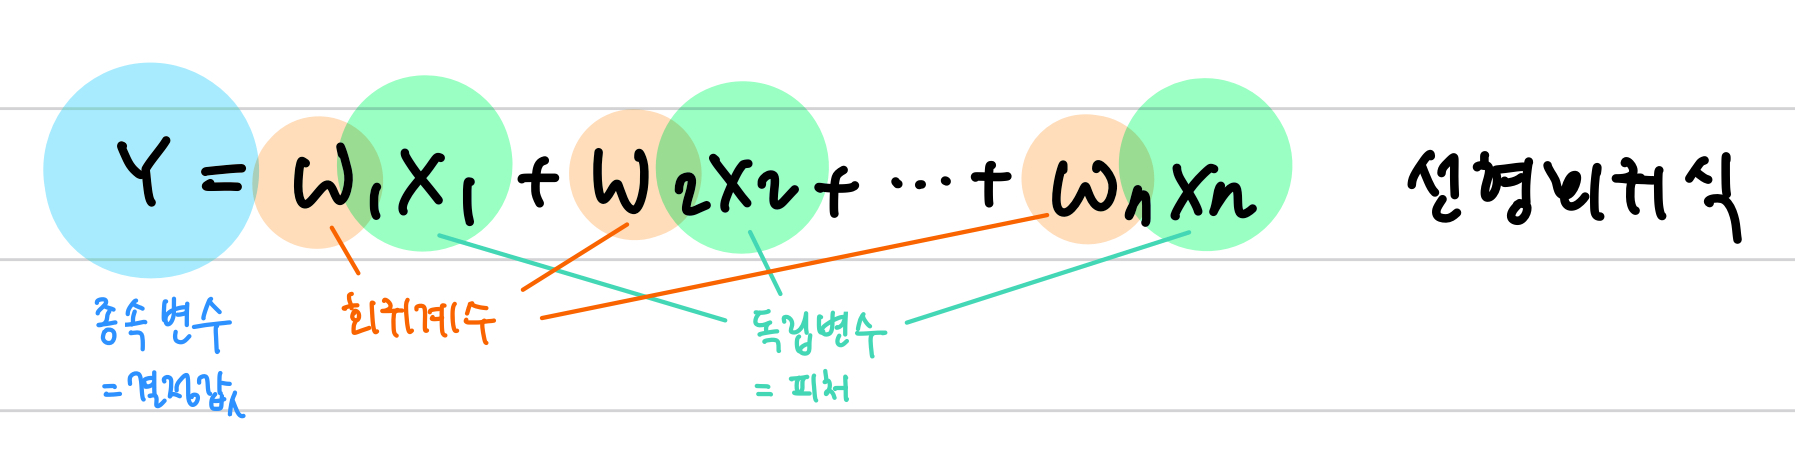

머신러닝 회귀 예측의 핵심 = 주어진 피처와 결정 값 데이터를 기반으로 학습을 통해 최적의 **회귀 계수**를 찾아내는 것!

* 회귀 유형 구분

| 독립변수 개수 | 회귀 계수의 결합 |
|-|-|
| 1개 : 단일 회귀  | 선형 : 선형 회귀 |
| 여러개 : 다중 회귀 | 비선형 : 비선형 회귀 |

* 지도학습 -> 분류 VS 회귀
    * 분류 : 예측 값이 카테고리 값(이산형 클래스 값)
    * 회귀 : 예측 값이 숫자 값 (연속값)



* 선형회귀 : 실제 값과 예측값의 차이(오류 제곱값, 잔차)를 최소화하는 직선형 회귀선을 최적화
    * 과적합 문제를 해결하기 위한 규제(Regularization) 방법에 따라 구분
        * 일반 선형 회귀 : RSS(Residual Sum of Squares, 잔차의 제곱)를 최소화 할 수 있도록 회귀 계수 최적화, 규제 적용 X
        * 릿지(Ridge) : 선형 회귀에 L2 규제를 추가 (상대적으로 큰 회귀계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만드는 규제 모델)
        * 라쏘(Lasso) : 선형 회귀에 L1 규제를 적용 (예측 영향력이 작은 피처의 회귀 계수를 0으로 만듦, 피처 선택 기능)
        * 엘라스틱넷(ElasticNet) : L2,L1 규제를 함께 결합. 주로 피처가 많은 데이터셋에서 사용, L1으로 피처의 개수 줄이고 + L2로 계수 값의 크기 조정.
        * 로지스틱 회귀(Logistic Regerssion) : 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델. 이진 분류 뿐만 아니라 희소 영역 분류(텍스트 분류)에서 뛰어난 예측 성능 보임.

## 단순 선형 회귀를 통한 이해

단순 선형 회귀 = 독립변수도 하나, 종속변수도 하나인 선형회귀
![회귀_페이지_07](https://user-images.githubusercontent.com/63237947/107805335-8e0bbf80-6da8-11eb-9f70-261c4c028867.jpg)




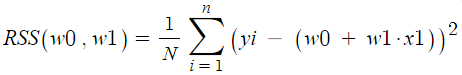

* RSS = 비용, w변수(회귀계수)로 구성되는 RSS를 __비용 함수(=손실함수, loss function)__ 라고 함. 
* 회귀 알고리즘은 RSS를 최소로 하는 w0,w1(회귀계수)를 학습을 통해서 찾는 것!

## 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

: 점진적으로 반복적인 계산을 통해 W 파라미류 값을 없데이트 하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식.

![image](https://user-images.githubusercontent.com/63237947/107850471-17bd9a80-6e46-11eb-877e-06d38b14b1d7.png)

![image](https://user-images.githubusercontent.com/63237947/107807414-7124bb80-6dab-11eb-86af-db663e4e6373.png)

회귀계수에서 편미분 결괏값을 반복적으로 빼주면서 w1,w0값을 업데이트.
편미분 값이 너무 클 수 있기 때문에 보정계수 **에타(η)** 를 곱하는데, 이를 `학습률` 이라고 함. 

![image](https://user-images.githubusercontent.com/63237947/107849238-471bd980-6e3d-11eb-8ae8-4fe55927b7d5.png)

![image](https://user-images.githubusercontent.com/63237947/107849239-4a16ca00-6e3d-11eb-9256-24ba7c6d6c35.png)


<span style="color:red">**[질문]**</span><br> p.296
* 편미분 한 결과값도 전미분처럼 "기울기"의 의미로 볼 수 있는지 ??
* 미분 직접 전개해보기

![image](https://user-images.githubusercontent.com/63237947/107809745-ee056480-6dae-11eb-9c8f-ea71842f632c.png)


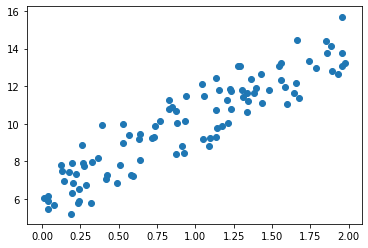

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

numpy 의 np.random. randint vs rand/randn<br>
https://nittaku.tistory.com/443

* np.random.randint 균일분포 (시작, n-1) 사이의 정수 난수 1개 생성
* np.random.rand(m,n) : 0 ~ 1의 균일분포 표준정규분포 난수를 matrix array(m,n) 생성
* np.random.randn(m,n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수를 matrix array(m,n) 생성

In [3]:
X.shape, y.shape #데이터셋 100개

((100, 1), (100, 1))

In [11]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) #모두1인 행렬과의 내적은 diff값을 계속 더하는 역할  
    # w0_update = -(2/N)*learning_rate*(np.sum(diff))   
    
    return w1_update, w0_update

In [6]:
# get_weight_updates()를 반복적으로 수행하여 w1과 w0를 업데이트

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [7]:
np.zeros((1,1))

array([[0.]])

In [4]:
# 비용함수 정의 : 실제 y값과 예측된  y값을 받아서 cost(RSS) 계산

def get_cost(y,y_pred) :
    N = len(y)
    cost = np.sum(np.square(y-y_pred)/N)
    return cost


In [12]:
w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


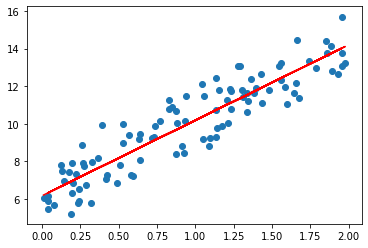

In [14]:
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')

대용량 데이터의 경우 `확률적 경사 하강법`이나, `미니 배치 확률적 경사 하강법`을 이용해 최적 비용 함수를 도출.


In [16]:
# (미니 배치) 확률적 경사 하강법 

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    #prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0]) #X인덱스 랜덤 셔플
        sample_X = X[stochastic_random_index[0:batch_size]] #0번~ batchsize개 인덱스 선택
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

*numpy.random.permutation* docs<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html

* 피처가 여러개인 경우의 예측 행렬

![image](https://user-images.githubusercontent.com/63237947/107849205-1e93df80-6e3d-11eb-8b11-665e3543e8fa.png)

![image](https://user-images.githubusercontent.com/63237947/107849210-22276680-6e3d-11eb-930e-d26ca026f934.png)


## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측


* 사이킷런이 지원하는 선형 모듈
https://scikit-learn.org/stable/modules/linear_model.html

### LinearRegerssion Class - Ordinary Least Squares

LinearRegerssion 클래스는 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스
* fit() 매서드로 X,y 배열을 입력받으면 회귀 계수 (Coefficients)인 W를 `coef_` 속성에 저장. 

`Class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)`

|  |  |
|-|-|
| 입력 파라미터 | `fit_intercept`: 디폴트 값은 True입니다. Intercept 값의 계산 여부를 설정합니다.<br>만약 False로 설정하게 되면 Intercept가 사용되지 않고 0으로 설정됩니다.<br>`normalize`: 디폴트 값은 False입니다. 만약 True로 설정하면 회귀를 수행하기 전에 입력 데이터 세트를 정규화 하여 줍니다. |
| 속성 | `coef_`: fit() 메서드를 수행하였을때 회귀 계수가 배열 형태로 저장하는 속성을 의미합니다.<br>* Shape는 (Target값 개수, 피처 개수) <br>`intercept_`: 절편 값 |

Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 `독립성`에 많은 영향을 받음. -> 피처간 상관관계가 높은 경우 분산이 커져서 오류에 민감함 : `다중공선성(multi-collinearity) 문제` <br>
=> 독립적인 중요한 피처만 남기고 제거하거나, 규제를 적용, PCA를 통해 차원축소를 진행...

### 회귀 평가 지표

실제 오류는 +,- 가 모두 존재 => 절댓값 평균이나 제곱, 제곱한 뒤 루트 ...

**회귀 평가 지표**

![image](https://user-images.githubusercontent.com/63237947/107850495-36bc2c80-6e46-11eb-815f-a51543db8519.png)


* `MAE`(Mean Absolute Error) : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것.
* `MSE`(Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균한 것.
* `RMSE`(Root MSE) : MSE에 루트를 씌운 것. MSE값은 오류으 제곱을 구하므로 실제 오류 평균보다 커지는 특성이 있기 때문.
* MSE와 RMSE에 Log를 취한 `MSLE`(Mean Squared Log Error), `RMSLE`(Root Mean Squared Log Error) 도 사용.
* `R^2` : 분산 기반으로 예측 성능을 평가. 1에 가까울수록 예측 정확도가 높음. <br>
= 예측값 Variance / 실제값 Variance

![image](https://user-images.githubusercontent.com/63237947/107849949-d88d4a80-6e41-11eb-905c-46f0d2c659f0.png)
![image](https://user-images.githubusercontent.com/63237947/107850237-433f8580-6e44-11eb-983f-31eaf4a2c368.png)
![image](https://user-images.githubusercontent.com/63237947/107850286-a3cec280-6e44-11eb-8137-1c4aacb43709.png)



보통의 경우 0<= R^2 <= 1
* 이때 그냥 mean value(평균값)를 예측하는 regression model을 쓴다면, 오차는 항상 편차와 동일하기 때문에 오차와 편차 제곱의 비율이 1이 되어 R^2 = 0이 된다. 
    * 만일 R^2가 1이라면, 이는 "오차^2 = 0인 상황이므로" training error가 0인 것을 의미한다. 
    * 만약 R^2가 0보다 작은 음수를 내는 경우는, 편차^2보다 오차^2이 더 큰 상황이고, 이는 내가 만든 regression model이 그냥 mean value로 예측하는 모델보다 예측성능이 더 낮은 비정상적인 경우를 의미한다.
* 즉, R^2 score는 mean value로 예측하는 Zero-R 모델에 비해, regression model의 성능이 얼마나 더 좋은가를 나타내는 것이다. 

> 출처 | https://en.wikipedia.org/wiki/Coefficient_of_determination , https://newsight.tistory.com/259

| 평가 방법 | 사이킷런 평가 지표 API | Scoring 함수 적용 값 |
|-|-|-|
| MAE | metrics.mean_absolute_error | neg_mean_absolute_error |
| MSE | metrics.mean_squared_error | neg_mean_squared_error |
| R^2 | metrics.r2_score | r2 |

* 사이킷런은 RMSE를 제공하지 않기 때문에, MSE에 제곱근을 씌워서 계산하는 함수를 직접 만들어야 함. 
* cross_val_score, GridSearchCV에서 scoring 함수를 적용할 때 유의할 점
    * neg_ : scoring 함수가 score값이 클수록 좋은 평가 결과로 평가하기 때문에 -1을 곱해서 보정해준 것.



## Linear Regression을 이용해 보스턴 주택 가격 회귀 구현

피처에 대한 설명

* CRIM: 지역별 범죄 발생률
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [3]:
# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


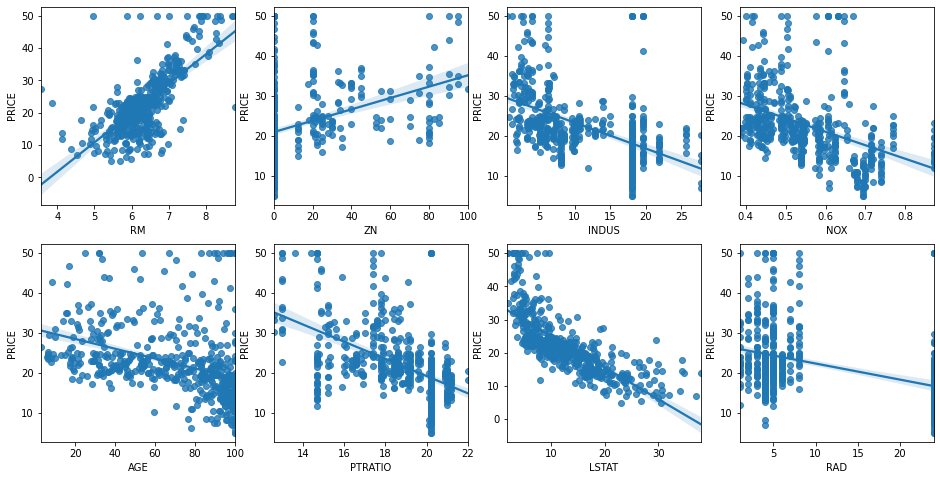

In [5]:
# 각 컬럼이 주택가격 회귀에 미치는 영향 조사 -> 각 칼럼 값이 증가할수록 Price값의 변화를 시각화
# matplotlib의 subplots() 이용

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2) 
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

RM과 LSTAT의 영향도가 가장 큼. 
* RM(방의 개수) : Positive Linearity가 가장 큼
* LSTAT(하위 계층의 비율) : Negativite Linarity가 가장 큼    

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3, random_state =156)


In [7]:
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

In [8]:
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [9]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.99559517216454
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [10]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [11]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

In [12]:
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) #MSE -> RMSE
avg_rmse = np.mean(rmse_scores)

In [13]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


## 다항회귀(Polynomial Regression)와 과(대)적합/과소적합 이해

### 다항 회귀 이해

독립변수의 단항식이 아닌 다항식으로 표현되는 것 = `다항회귀`<br>
ex) $y=w_0+w_1x_1+w_2x_2+w_3x_1x_2+w_4x_1^2+w_5x_2^2$

* 다항회귀는 `선형회귀`임. => 비선형회귀(x)
    * 회귀에서 선형/비선형의 기준은 회귀계수(w)에 따름.


* 사이킷런은 다항 회귀를 위한 클래스가 없으므로 -> 비선형함수를 선형 모델에 적용시키는 방법을 사용해 구현. 
    * 1. `PolynomialFeature`클래스를 사용해 다항식 피처로 변환 : fit() + transform() 
    Ex) [x1,x2] -> [1,x1,x2,x1^2,x1x2,x2^2] 
    * 2. `LinearRegression` 클래스로 다항 회귀 구현<br>

In [14]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

# degree = 2 인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


<span style="color:red">**[질문]**</span><br>
> p.311 

Q. PolynomialFeatures을 왜 쓰는거지...? 그냥 여기가 이해가 안됨...

A. 우리는 W(계수)값을 구해야 -> [다항식 계수 feature(x),결정값(y)] 을 회귀로 fit 하면 -> 원래 수식의 w값이 나옴 : X(피처)와 Y를 넣었을 때 X의 W값을 구해주는 것이 회귀. 
PolynomialFeatures를 통해 feature를 몇개 더 추가해주는 것 뿐,,,?

$y=1+2x_1+3x_1^2+4x_2^3$ <br>
3차 다항식 계수 feature [$1,x_1,x_2,x_1^1,x_1x_2,x_2^2,x_1^3,x_1^2x_2,x_1x_2^2,x_2^3 $]<br>
=> 계수 값은 [1,2,0,3,0,0,0,0,0,0,4]

In [15]:
def polynomial_func(X): #3차 다항식 결정값을 구하는 함수
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [16]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)


3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [17]:
# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


사이킷런의 Pipeline 객체로 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
model = model.fit(X, y) #poly transform 안해도 됨
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 보스턴 주택가격 예측

In [20]:
# boston 데이타셋 로드
boston = load_boston()
# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)
# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


Boston 데이타셋 크기 : (506, 14)


In [21]:
# Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)


In [22]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598


### 다항 회귀를 이용한 과소적합 및 과적합 이해

차수가 높아질수록 과적합 문제가 크게 발생. 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X) 

np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15] #다항식의 차수

X = np.sort(np.random.rand(n_samples)) #0~1 30개의 데이터 샘플링
y = true_fun(X) + np.random.randn(n_samples) * 0.1 #잡읍이 포함된 다항식의 코사인 그래프


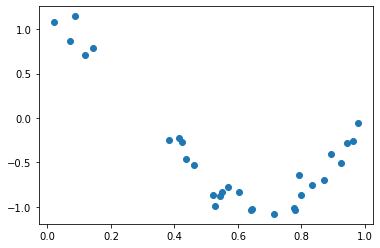

In [32]:
plt.scatter(X, y)


degree 1의 회귀 계수는 [-1.61]입니다.
Degree 1의 MSE는 0.40772896250986845입니다.

degree 4의 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4의 MSE는 0.043208749872317556입니다.

degree 15의 회귀 계수는 [-2.98295000e+03  1.03900050e+05 -1.87417308e+06  2.03717524e+07
 -1.44874234e+08  7.09320168e+08 -2.47067524e+09  6.24565587e+09
 -1.15677381e+10  1.56896159e+10 -1.54007266e+10  1.06458152e+10
 -4.91381762e+09  1.35920853e+09 -1.70382347e+08]입니다.
Degree 15의 MSE는 181777900.10696036입니다.


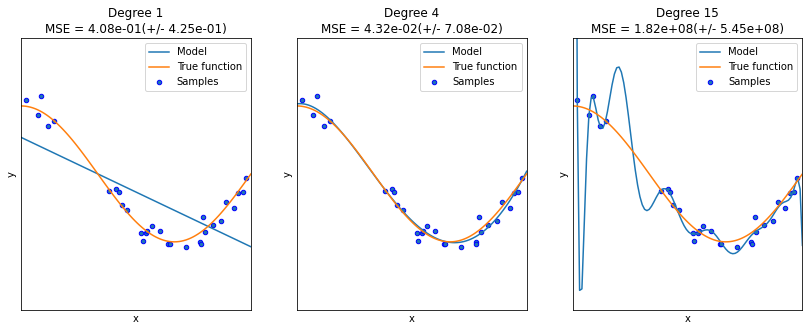

In [28]:
# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # polynomial로 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    # 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\ndegree {0}의 회귀 계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0}의 MSE는 {1}입니다.'.format(degrees[i],-1*np.mean(scores)))

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") #예측값 곡선
    plt.plot(X_test, true_fun(X_test), label="True function") #실제값 곡선
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))


plt.show()

### 편향-분산 트레이트오프(Bias-Variance Trade off)

* 매우 단수화된 모델 = 고편향(High Bias)
* 매우 복잡해서 지나치게 높은 변동성을 가진 모델 = 고분산(High Variance)
* 저편향-저분산을 가지는 모델이 성능이 좋음. 
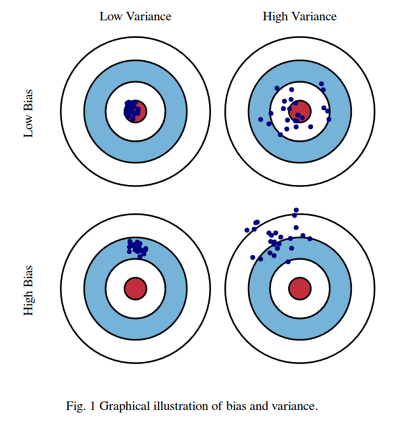

* 일반적으로 편향이 높으면 분산은 낮아지고(과소적합), 분산이 높으면 편향이 낮아짐(과적합).
    * 높은 편향 + 낮은 분산에서 과소적합되기 쉬우며
    * 낮은 편향 + 높은 분산에서 과적합되기 쉬움.

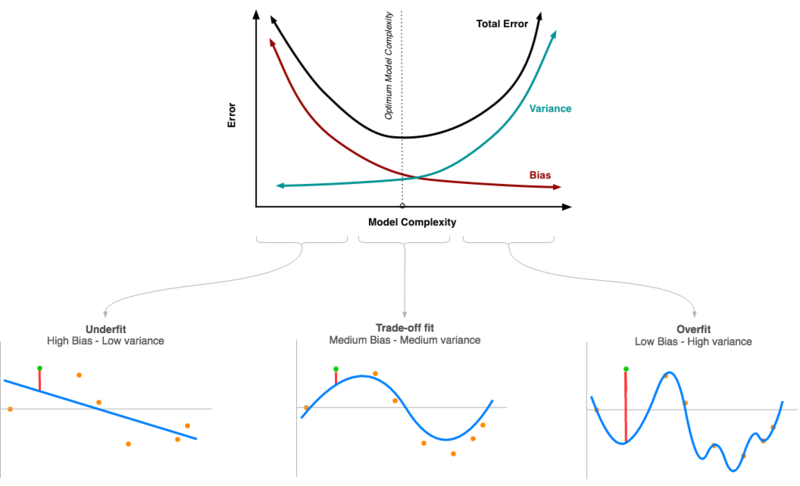

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### 규제 선형 모델의 개요

좋은 회귀 모델을 만드려면 데이터에 적절히 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함.
* 회귀 계수 크기를 제어해 과적합을 개선하기 위한 비용함수(Cost) <br>
비용함수 목표 = $Min(RSS(W)) + \alpha*\begin{Vmatrix}W\end{Vmatrix}_{2}^{2}$
    * alpha = 튜닝 파라미터, 비용함수 목표를 최소화하는 W벡터를 찾는 것!
        * alpha = 0 (or 매우 작은 값), 비용 함수 식은 기존 RSS 식과 동일. -> W가 커져도 어느정도 상쇄 가능, RSS(W)를 최소화
        * alpha = 무한대(or 매우 큰 값), 뒤에 항이 너무 커지므로 W를 매우 작게 만들어야 Cost가 작아짐. -> 비용 함수는 회귀 계수 W값 감소시킴
        * alpha값이 커질수록 회귀 계수 값의 크기를 감소시킴.

_______
비용함수에 alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식 = 규제(Regularization)
* L2 방식 = 릿지(Ridge) 회귀 : $\alpha*\begin{Vmatrix}W\end{Vmatrix}_{2}^{2}$
* L1 방식 = 라쏘(Lasso) 회귀 : $\alpha*\begin{Vmatrix}W\end{Vmatrix}_{1}$  -> 영향력이 크지 않은 회귀 계수를 0으로 변환


### 릿지 회귀

* `Ridge` 클래스
    * 주요 파라미터 : alpha(L2 규제 계수)
    

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse)) 
#앞서 규제를 적용하지 않은 회귀에서는 5 folds 의 평균 RMSE : 5.829 

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [35]:
# alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


alpha값이 100일때 가장 좋은 rmse값을 가짐.

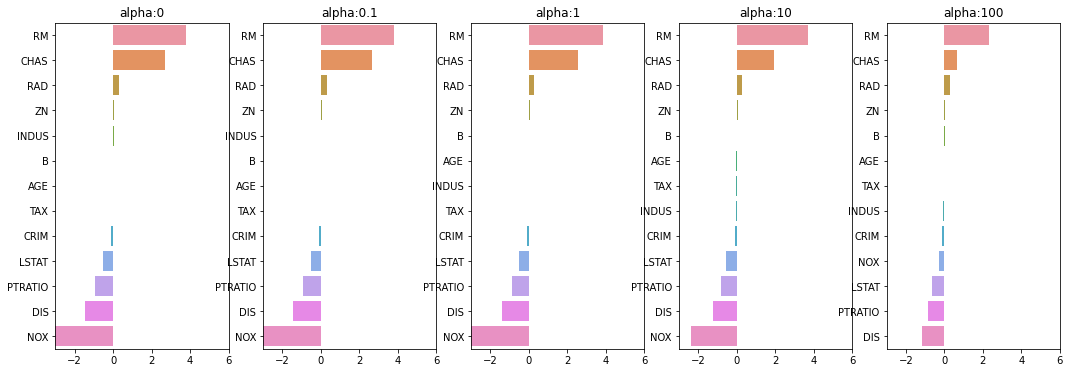

In [36]:
# 각 alpha에 따른 회귀 계수 값을 시각화. 
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. 
for pos , alpha in enumerate(alphas) : # pos는 axis의 위치 지정
    ridge = Ridge(alpha = alpha) 
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [37]:
# alpha 값에 따른 컬럼별 회귀계수 출력

ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음. 

### 라쏘 회귀
불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함. -> 피처 선택의 특성

* `Lasso` 클래스
    * 주요 파라미터 : alpha (L1 규제 계수)

In [39]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                         scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [40]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)
#######  Lasso #######

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


alpha가 0.07일 때 가장 좋은 평균 rmse를 가짐.

In [41]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순(a=0.07)으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜. 

### 엘라스틱넷 회귀

L2와 L1 규제를 결합한 회귀
* $RSS(W) + \alpha*\begin{Vmatrix}W\end{Vmatrix}_{2}^{2}+  \alpha*\begin{Vmatrix}W \end{Vmatrix}_{1}$ 식을 최소화하는 W를 찾는 것!
* `ElasticNet` 클래스
    * 주요 파라미터 : alpha, l1_ratio
        * a*L1 + b*L2 -> alpha = a+b
        * l1_ratio = a/(a+b)
            * l1_ratio = 0 -> a=0 -> L2 규제와 동일
            * l1_ratio = 1 -> b=0 -> L1규제와 동일 
            

In [42]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# alpha값 변화에 의한 결과만 관찰하기 위해 l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [43]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


Lasso 보다는 상대적으로 0이 되는 값이 적음을 알 수 있음. 

### 선형 회귀 모델을 위한 데이터 변환

* 선형 회귀 모델은 피처-타깃값 간의 선형 관계를 가정함. 
* 피처값과 타깃값의 분포가 정규분포 형태를 선호
* 왜곡(skew)된 형태의 분포도일 때는 예측 성능이 떨어질 가능성 높음.

-> 선형 회귀를 적용하기 전에 테이터 스케일링/정규화 작업을 진행하는 것이 일반적. 

* 선형 회귀에서는 주로 로그 변환 (log transformation) 사용<br> ->원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포됨.
    * `타깃 값`의 경우에는 일반적으로 로그 변환을 적용! 결정 값을 정규분포 등으로 변환하면 다시 원복하기 어려울 수 있기 때문. 

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data) #log함수는 언더플로우가 발생하기 쉬워 1+log()함수 구현
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    
    return scaled_data


In [45]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

log 변환을 수행하면 대부분의 경우에 성능 향상

## 로지스틱 회귀

* 로지스틱 회귀는 `분류`에 사용. 
* 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라, `시그모이드 함수`의 최적선을 찾고 -> 시그모이드 반환 값을 확률로 간주해 분류.
    * 시그모이드 함수 : 0~1 사이 값을 반환

In [46]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


* `LogisticRegerssion` 클래스 주요 하이퍼 파라미터
    * penalty : 규제 종류 ex) l1,l2 (default = l2) 
    * C : 1/alpha (규제 강도 조절하는 alpha값의 역수)

In [49]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Yujin\anaconda3\envs\dsvenv\lib\site-packages\sklearn\model_selection\_validation.py:552: Fi

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


## 회귀 트리

트리를 기반으로 하는 회귀 방식
* 리프 노드에 속한 데이터 값의 평균 값을 구해 회귀 예측값을 계산
* 트리 기반 회귀와 분류의 estimator 클래스
| 알고리즘 | 회귀 Estimator 클래스 | 분류 Estimator 클래스 |
|:-:|:-:|:-:|
| Decision Tree | DecisionTreeRegressor | DecisionTreeClassifier |
| GBM | GradientBoostingRegressor | GradientBoostingClassifier |
| XGBoost | XGBRegressor | XGBClassifier |
| LightGBM | LGBMRegressor | LGBMClassifier |

In [50]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [52]:
# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [53]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [57]:
# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
[14:37:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


<AxesSubplot:>

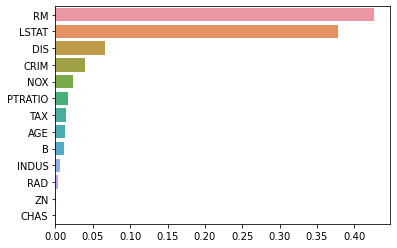

In [58]:
# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


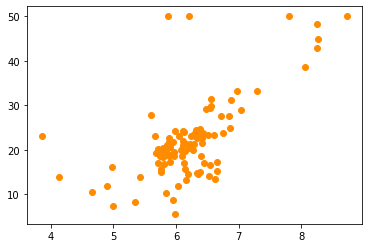

In [59]:
# feature importance가 가장 높은 RM칼럼만 이용.
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0) #100개만 샘플링
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [62]:
#max_depth 파라미터 변화시키면서 회귀 예측선 변화 관찰

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg=LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


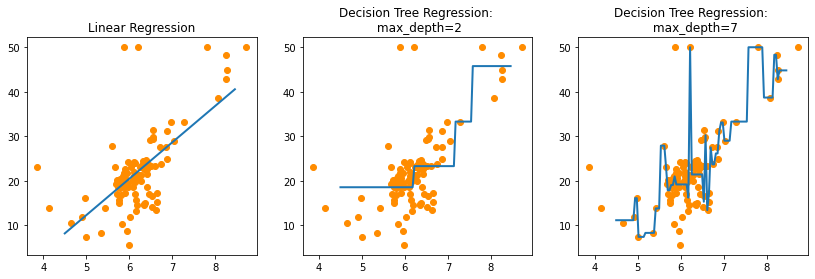

In [63]:
# 4.5 ~ 8.5 사이 X축값을 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)


* 선형 회귀는 직선으로 예측 회귀선을 표현
* 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만듦